In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
df = pd.read_excel('prepdata.xlsx',index_col=0,parse_dates=True)
df.dropna(axis='columns',inplace=True)

In [4]:
df.head()

,CO1 Comdty,CO2 Comdty,CO3 Comdty,CO4 Comdty,PVMMDS12 Index,PVMMDS23 Index,PVMMD2M3 Index,PVMMD3M4 Index,PVMMDBSP Index,DKI1 Comdty,...,CFCDQORS Index,CFCDPORL Index,CFCDPORS Index,CFCDQPTS Index,CFCDQSWD Index,CFCDPMMD Index,OISTCRDE Index,GBPUSD Curncy,EURUSD Curncy,JPYUSD Curncy
2018-01-02,66.57,66.13,65.79,65.51,0.25,0.25,0.25,0.25,3.08,64.01,...,55237,36753,39940,70,388157,47687,2480,1.3590,1.2059,0.008906
2018-01-03,67.84,67.29,66.90,66.57,0.26,0.26,0.26,0.26,3.36,65.24,...,55237,36753,39940,70,388157,47687,2526,1.3516,1.2015,0.008888
2018-01-04,68.07,67.51,67.11,66.77,0.29,0.29,0.29,0.29,3.34,65.30,...,55237,36753,39940,70,388157,47687,2539,1.3551,1.2068,0.008869
2018-01-05,67.62,67.10,66.73,66.41,0.28,0.26,0.28,0.26,3.29,64.93,...,55237,36753,39940,70,388157,47687,2539,1.3571,1.2029,0.008844
2018-01-08,67.78,67.31,66.95,66.64,0.26,0.24,0.26,0.24,3.24,65.09,...,55237,36753,39940,70,388157,47687,2538,1.3568,1.1967,0.008842


In [58]:
t_index = np.asarray(df.index.tolist(),dtype=np.datetime64)
y1 = np.asarray(df['PVMPGDM1 Index'].tolist(),dtype=np.float64)
y2 = np.asarray(df['JPYUSD Curncy'].tolist(),dtype=np.float64)

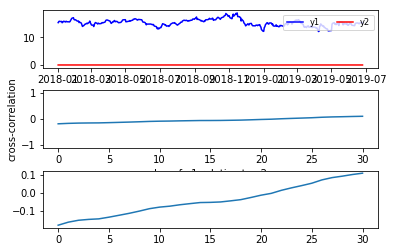

Cross correlate coefficient
Formula calculation : -0.18163452398720417
Using correlate function :  0.5490221279001879
Numpy :  0.5490221279001879
MSE:  232.4842107325783
RMSE:  15.24743292271123


In [65]:
def crocor(x,y):
 npts = len(x)
 lags = np.arange(0,31)
 # Cross covariance
 ccov = np.correlate((y1 - y1.mean()), y2 - y2.mean(), mode='full')
 # Cross correlation coefficient
 ccor = ccov / (y1.std() * y2.std() * npts)
 return (ccor, lags)
 
# ################3
# Cross correlation coefficient by user defined function
# numpy.correlate (Cross correlate) calculates the similarity
# between two vectors/signals as a function of lag
# Seems it's wrong
pcc = np.correlate( (y1-y1.mean())/np.std(y1)/len(y1) , (y2-y2.mean())/np.std(y2) , mode='full')

# Plot
ccor, lags = crocor(y1,y2)
fig, axs = plt.subplots(nrows=3)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(t_index, y1, 'b', label='y1')
ax.plot(t_index, y2, 'r', label='y2')
#ax.set_ylim(50,90)
ax.legend(loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(lags, ccor[385:416])

ax.set_ylim(-1.1, 1.1)
#ax.set_xlim(0,400)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of y1 relative to y2')

ax = axs[2]
ax.plot(lags,pcc[385:416])

#maxlag = lags[np.argmax(ccor)]
# print("max correlation is at lag %d" % maxlag)
# print(np.argmax(ccor))
plt.show()


# ############################
# Cross correlation coefficient according to the formula
# In signal processing ,
# numpy.correlate (Cross correlate) calculates the similarity between two vectors/signals
# as a function of lag
aa = np.cov(y1,y2, bias=True) # Without the option 'bias=True', numpy.cov calculates the sample covariance
print('Cross correlate coefficient')
print('Formula calculation :', (aa[0][1]/(y1.std() * y2.std()) ))
print('Using correlate function : ', np.max(ccor))
print('Numpy : ', np.max(pcc))

# #######################
# Mean Square Error
mse = ((y1-y2)**2).sum() / len(y1)
# Root Mean Square Error
rmse = math.sqrt(mse)
print('MSE: ', mse)
# RMSE by numpy
print('RMSE: ' , np.sqrt(np.mean((y1-y2)**2)) )

In [7]:
maxElement = np.amax(ccor[385:])
print('Max Correlation : ', maxElement)

result = np.where(ccor[385:] == maxElement)
print('lag :', result[0][0])

Max Correlation :  0.32591268188219186
lag : 104


In [8]:
main_index=['PVMPGDM1 Index','PVMPGDM2 Index','PVMPGDM3 Index','PVMPGDM4 Index']
second_index = df.drop(main_index,axis=1).columns.tolist()

In [13]:
df.describe()

,CO1 Comdty,CO2 Comdty,CO3 Comdty,CO4 Comdty,PVMMDS12 Index,PVMMDS23 Index,PVMMD2M3 Index,PVMMD3M4 Index,PVMMDBSP Index,DKI1 Comdty,...,CFCDQORS Index,CFCDPORL Index,CFCDPORS Index,CFCDQPTS Index,CFCDQSWD Index,CFCDPMMD Index,OISTCRDE Index,GBPUSD Curncy,EURUSD Curncy,JPYUSD Curncy
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,...,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,69.809741,69.555907,69.324508,69.111321,0.382124,0.334041,0.379870,0.332850,2.540181,68.109896,...,41130.829016,88261.533679,23510.248705,70.595855,436830.507772,58081.624352,2253.979275,1.321701,1.163998,0.009066
std,6.816642,6.752526,6.660668,6.569802,0.297341,0.220537,0.287017,0.215998,1.169886,6.274358,...,11032.737667,34129.741014,10444.854499,3.568605,40589.424272,9222.234422,276.318468,0.045700,0.039129,0.000170
min,50.470000,50.770000,51.020000,51.310000,-0.200000,-0.210000,-0.180000,-0.170000,0.190000,53.890000,...,21070.000000,36753.000000,4472.000000,63.000000,327329.000000,37817.000000,1293.000000,1.248700,1.112900,0.008731
25%,65.140000,64.920000,64.567500,64.282500,0.172500,0.212500,0.190000,0.210000,1.462500,62.685000,...,32490.000000,58947.000000,12750.000000,68.000000,409006.000000,52643.000000,2066.500000,1.287800,1.133725,0.008950
50%,70.205000,69.500000,69.020000,68.580000,0.325000,0.330000,0.300000,0.320000,2.990000,68.155000,...,40678.000000,74289.000000,24776.000000,70.000000,439767.000000,55868.000000,2225.500000,1.310050,1.153350,0.009042
75%,74.770000,74.742500,74.565000,74.437500,0.570000,0.487500,0.565000,0.490000,3.497500,72.697500,...,48537.000000,119760.000000,31579.000000,73.000000,467372.000000,65417.000000,2480.750000,1.349800,1.180600,0.009159
max,86.290000,85.830000,85.450000,85.140000,1.320000,0.850000,1.230000,0.860000,4.640000,84.110000,...,64683.000000,168987.000000,48506.000000,79.000000,532294.000000,74407.000000,2714.000000,1.433900,1.251000,0.009547


In [28]:
df['PVMPGDM1 Index'].mean()

15.20961139896373

In [50]:
index_mean = []
negative_index = []
for x in df.columns.tolist():
    if df[x].mean() < 0 :
        negative_index.append(x)
    index_mean.append(df[x].mean())
df[negative_index].mean()

PVMPGEW1 Index        -7.341969
ICCBAORN Index   -110960.386010
ICFUAPMN Index   -152313.759067
ICFUAORN Index   -109430.189119
ICCBAPMN Index   -153047.974093
CFCDQSWN Index   -584543.012953
CFCDQPMN Index     -6620.261658
CFCDPSWN Index   -152178.380829
dtype: float64

In [55]:
main_index_mean = []
for x in main_index:
    main_index_mean.append(df[x].mean())

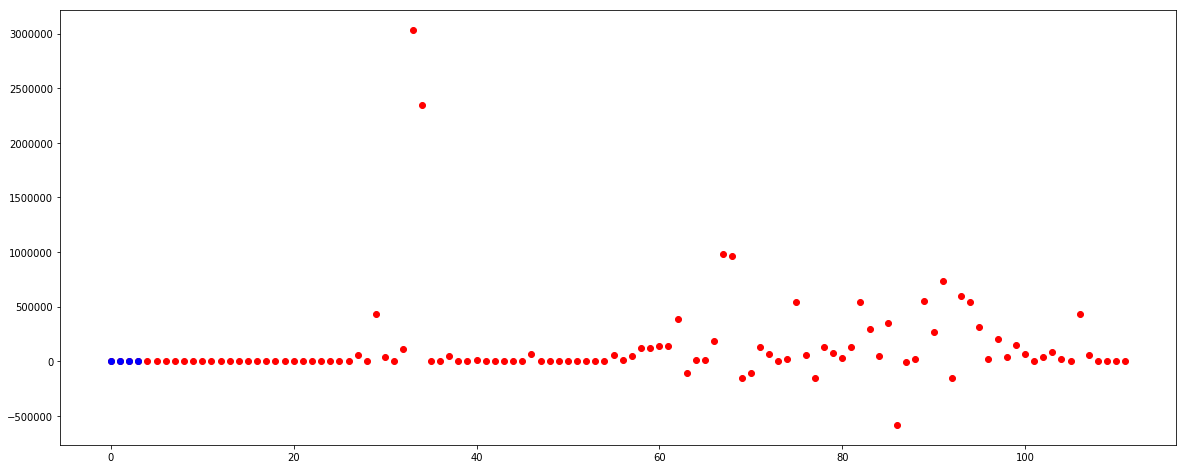

In [57]:
plt.figure(figsize=(20,8))
plt.plot(index_mean,'ro')
plt.plot(main_index_mean,'bo')

In [53]:
index_std = []
zerostd_index = []
for x in df.columns.tolist():
    if df[x].std() == 0 :
        zerostd_index.append(x)
    index_std.append(df[x].std())
df[zerostd_index].std()

CUCNST Index    7.470382e-14
DSCNST Index    2.223328e-14
dtype: float64